Pull the complete results and open them

In [1]:
# Grab the result-jsons
!curl -L -O https://raw.githubusercontent.com/jakobwes/QA_layer_freeze/main/results/results_finetuned_XLM.json
!curl -L -O https://raw.githubusercontent.com/jakobwes/QA_layer_freeze/main/results/results_finetuned_mBERT.json
!curl -L -O https://raw.githubusercontent.com/jakobwes/QA_layer_freeze/main/results/results_non_finetuned_XLM.json
!curl -L -O https://raw.githubusercontent.com/jakobwes/QA_layer_freeze/main/results/results_non_finetuned_mBERT.json
!curl -L -O https://raw.githubusercontent.com/jakobwes/QA_layer_freeze/main/results/specific_layers_freezed_XLM/results_4_layers_freezed_XLM.json
!curl -L -O https://raw.githubusercontent.com/jakobwes/QA_layer_freeze/main/results/specific_layers_freezed_XLM/results_no_layers_freezed_XLM.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41147  100 41147    0     0   197k      0 --:--:-- --:--:-- --:--:--  197k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40992  100 40992    0     0   226k      0 --:--:-- --:--:-- --:--:--  226k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41105  100 41105    0     0   244k      0 --:--:-- --:--:-- --:--:--  244k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41161  100 41161    0     0   254k      0 --:--:-- --:--:-- --:--:--  254k
  % Total    % Received % Xferd  Average Speed   Tim

In [2]:
import json

with open("results_finetuned_XLM.json", "r") as read_file_finetuned_XLM:
    results_finetuned_XLM = json.load(read_file_finetuned_XLM)

with open("results_finetuned_mBERT.json", "r") as read_file_finetuned_mBERT:
    results_finetuned_mBERT = json.load(read_file_finetuned_mBERT)

with open("results_non_finetuned_XLM.json", "r") as read_file_non_finetuned_XLM:
    results_non_finetuned_XLM = json.load(read_file_non_finetuned_XLM)

with open("results_non_finetuned_mBERT.json", "r") as read_file_non_finetuned_mBERT:
    results_non_finetuned_mBERT = json.load(read_file_non_finetuned_mBERT)

with open("results_4_layers_freezed_XLM.json", "r") as read_file_4_layers_freezed_XLM:
    results_4_layers_freezed_XLM = json.load(read_file_4_layers_freezed_XLM)

with open("results_no_layers_freezed_XLM.json", "r") as read_file_no_layers_freezed_XLM:
    results_no_layers_freezed_XLM = json.load(read_file_no_layers_freezed_XLM)


# Visualisation

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Folder for saving the plots:

In [4]:
if not os.path.exists("./plots"):
    os.makedirs("./plots")


Helper-functions:

In [5]:
def get_mlqa_f1_by_layer(result_dict, language_index):
  f1_scores = []
  for layer_num in range(1, len(result_dict["mlqa"].keys())+1):
    layer = "layers "+str(layer_num)
    f1_scores.append(result_dict["mlqa"][layer][language_index]["predict results"]["f1"])
  return f1_scores

def get_mlqa_exact_match_ratio_by_layer(result_dict, language_index):
  exact_match_ratios = []
  for layer_num in range(1, len(result_dict["mlqa"].keys())+1):
    layer = "layers "+str(layer_num)
    exact_match_ratios.append(result_dict["mlqa"][layer][language_index]["predict results"]["exact_match"]/result_dict["mlqa"][layer][language]["predict results"]["predict_samples"])
  return exact_match_ratios


def get_squad_f1_by_layer(result_dict):
  f1_scores = []
  for layer_num in range(1, len(result_dict["mlqa"].keys())+1):
    layer = "layers "+str(layer_num)
    f1_scores.append(result_dict["squad"][layer]["eval results"]["f1"])
  return f1_scores

def get_squad_exact_match_ratio_by_layer(result_dict):
  exact_match_ratios = []
  for layer_num in range(1, len(result_dict["mlqa"].keys())+1):
    layer = "layers "+str(layer_num)
    exact_match_ratios.append(result_dict["squad"][layer]["eval results"]["exact_match"]/result_dict["squad"][layer]["eval results"]["predict_samples"])
  return exact_match_ratios


## F1 over layers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


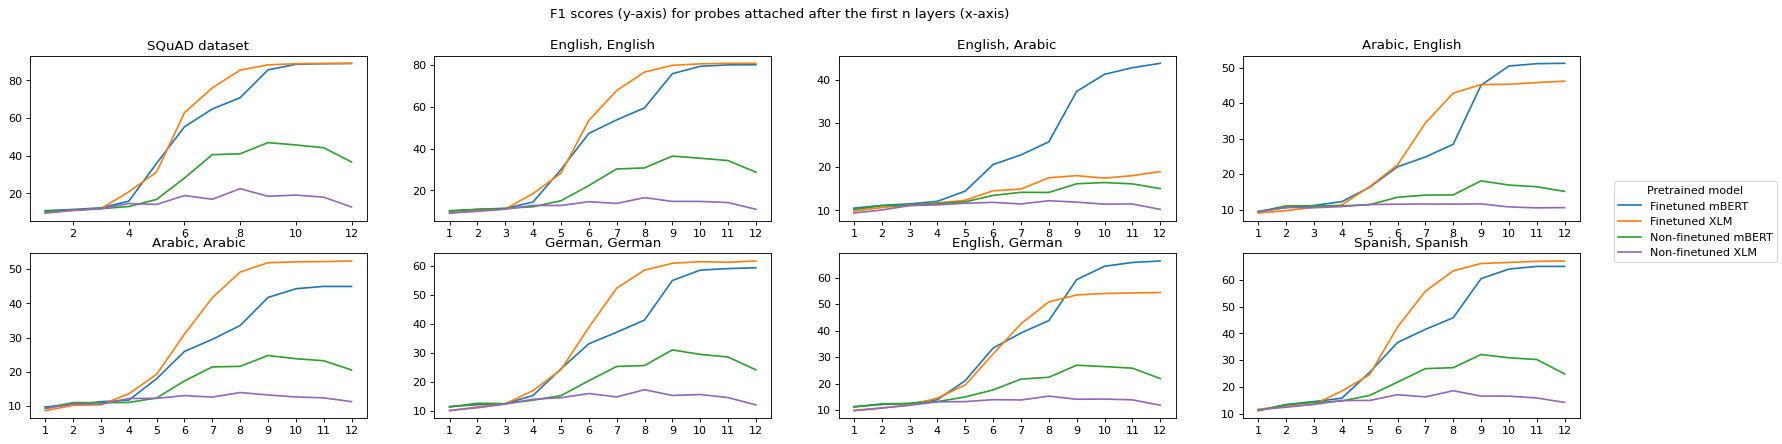

In [6]:
language_indexes = [ 'mlqa_en_en', 'mlqa_en_ar', 'mlqa_ar_en', 'mlqa_ar_ar', 'mlqa_de_de', 'mlqa_en_de','mlqa_es_es']

language_texts = ["English, English", "English, Arabic", "Arabic, English", "Arabic, Arabic", "German, German", "English, German", "Spanish, Spanish"]

fig = plt.figure(figsize=(25, 6), dpi=80)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# SQUAD-plot
ax = fig.add_subplot(2, 4, 1)
ax.plot(list(range(1, 13)), get_squad_f1_by_layer(results_finetuned_mBERT), color = "tab:blue")
ax.plot(list(range(1, 13)), get_squad_f1_by_layer(results_finetuned_XLM), color = "tab:orange")
ax.plot(list(range(1, 13)), get_squad_f1_by_layer(results_non_finetuned_mBERT), color = "tab:green")
ax.plot(list(range(1, 13)), get_squad_f1_by_layer(results_non_finetuned_XLM), color = "tab:purple")
ax.set_title("SQuAD dataset")

# MLQA-plots
for i, language_index_pair in enumerate(language_indexes, 2):
  ax = fig.add_subplot(2, 4, i)
  ax.plot(list(range(1, 13)), get_mlqa_f1_by_layer(results_finetuned_mBERT, language_index_pair), color = "tab:blue")
  ax.plot(list(range(1, 13)), get_mlqa_f1_by_layer(results_finetuned_XLM, language_index_pair), color = "tab:orange")
  ax.plot(list(range(1, 13)), get_mlqa_f1_by_layer(results_non_finetuned_mBERT, language_index_pair), color = "tab:green")
  ax.plot(list(range(1, 13)), get_mlqa_f1_by_layer(results_non_finetuned_XLM, language_index_pair), color = "tab:purple")


  ax.set_title(language_texts[i-2])
  plt.xticks(range(1, 13))

fig.legend(ax,     # The line objects
           labels=["Finetuned mBERT", "Finetuned XLM", "Non-finetuned mBERT", "Non-finetuned XLM"],   # The labels for each line
           loc="center right",   # Position of legend
           title="Pretrained model"  # Title for the legend
           )



fig.suptitle("F1 scores (y-axis) for probes attached after the first n layers (x-axis)")

plt.savefig('plots/f1_over_layers.png')


## Final F1-scores for finetuned models



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


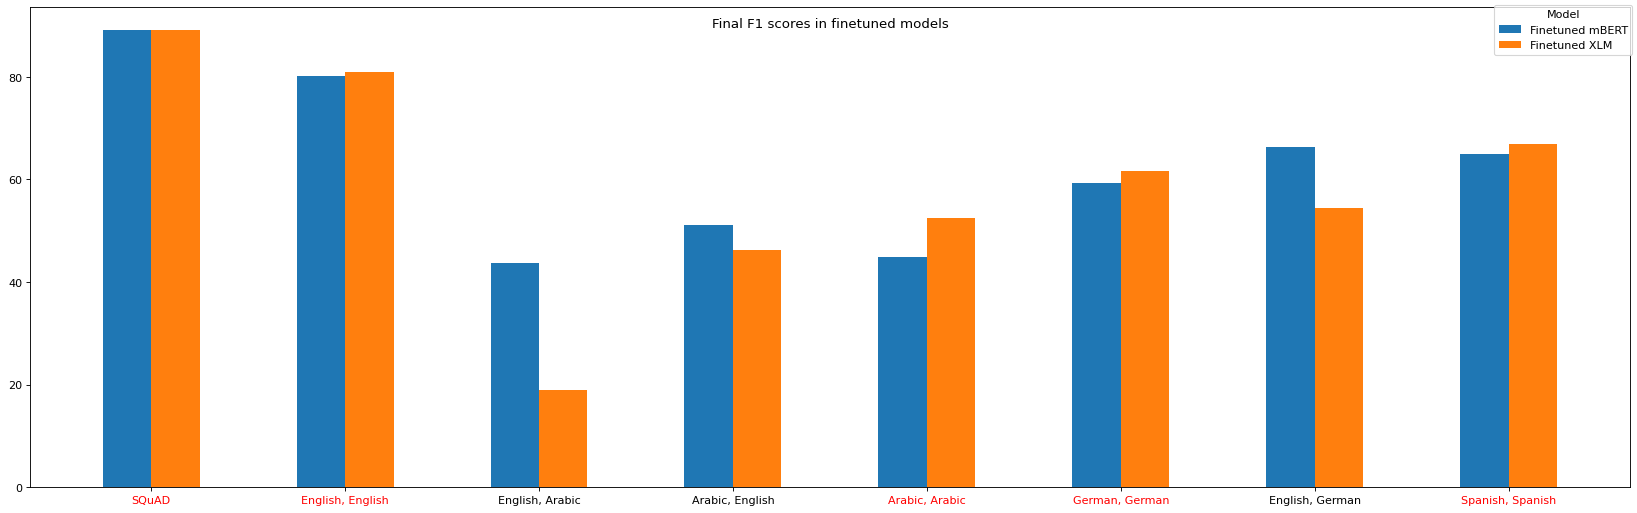

In [7]:
language_indexes = [ 'mlqa_en_en', 'mlqa_en_ar', 'mlqa_ar_en', 'mlqa_ar_ar', 'mlqa_de_de', 'mlqa_en_de','mlqa_es_es']

language_texts = ["SQuAD", "English, English", "English, Arabic", "Arabic, English", "Arabic, Arabic", "German, German", "English, German", "Spanish, Spanish"]

max_f1_by_languages_XLM = []
max_f1_by_languages_mBERT = []

# Add final squad f1
max_f1_by_languages_XLM.append(get_squad_f1_by_layer(results_finetuned_XLM)[-1])
max_f1_by_languages_mBERT.append(get_squad_f1_by_layer(results_finetuned_mBERT)[-1])

# Add final mlqa-f1 for each language-pair
for language_index_pair in language_indexes:
  max_f1_by_languages_XLM.append(get_mlqa_f1_by_layer(results_finetuned_XLM, language_index_pair)[-1])
  max_f1_by_languages_mBERT.append(get_mlqa_f1_by_layer(results_finetuned_mBERT, language_index_pair)[-1])

# Barplot
X = np.arange(8)
fig = plt.figure(figsize=(20, 6), dpi=80)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, max_f1_by_languages_mBERT, width = 0.25)
ax.bar(X + 0.25, max_f1_by_languages_XLM, width = 0.25)

plt.xticks(X + 0.25/2, language_texts)

fig.legend(ax,     # The line objects
           labels=["Finetuned mBERT", "Finetuned XLM"],   # The labels for each line
           loc="best",   # Position of legend
           title="Model"  # Title for the legend
           )

# Mark monolingual QA-tasks in red
for i in [0, 1, 4, 5, 7]:
  plt.gca().get_xticklabels()[i].set_color('red') 

fig.suptitle("Final F1 scores in finetuned models")

plt.savefig('plots/finalf1_finetuned.png', bbox_inches = "tight", dpi=300)

## Final F1 scores for non-finetuned models

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


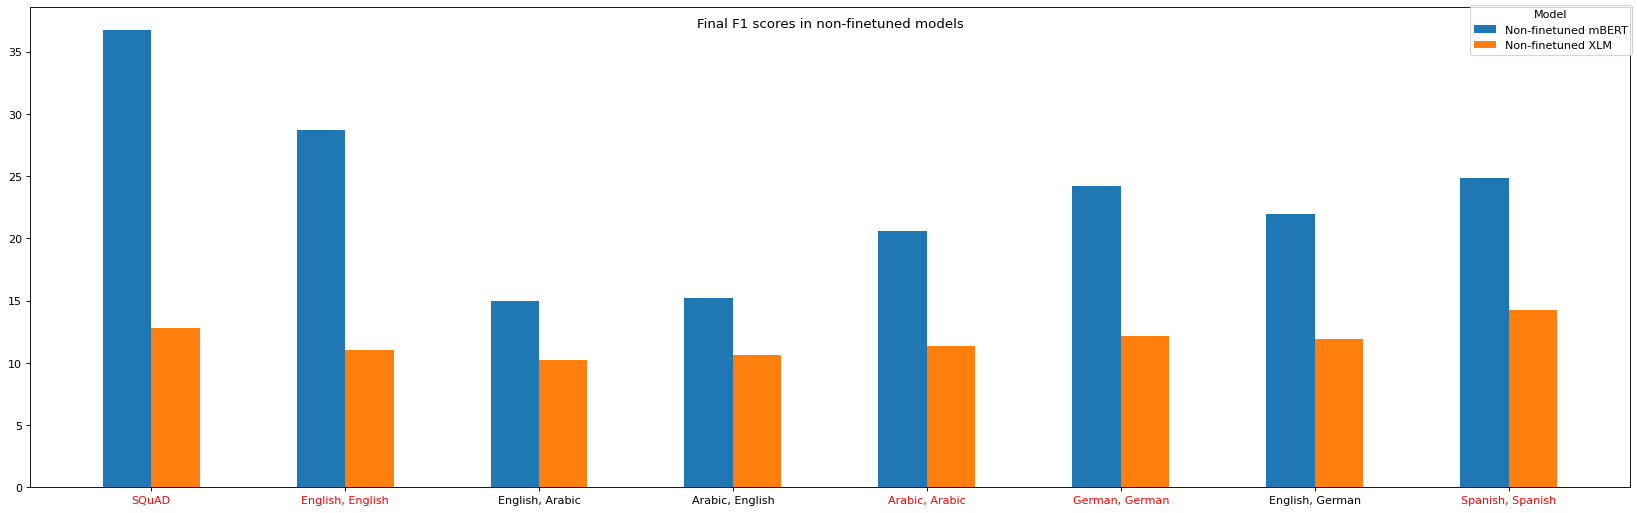

In [8]:
language_indexes = [ 'mlqa_en_en', 'mlqa_en_ar', 'mlqa_ar_en', 'mlqa_ar_ar', 'mlqa_de_de', 'mlqa_en_de','mlqa_es_es']

language_texts = ["SQuAD", "English, English", "English, Arabic", "Arabic, English", "Arabic, Arabic", "German, German", "English, German", "Spanish, Spanish"]

final_f1_by_languages_non_finetuned_XLM = []
final_f1_by_languages_non_finetuned_mBERT = []

# Add final squad f1
final_f1_by_languages_non_finetuned_XLM.append(get_squad_f1_by_layer(results_non_finetuned_XLM)[-1])
final_f1_by_languages_non_finetuned_mBERT.append(get_squad_f1_by_layer(results_non_finetuned_mBERT)[-1])

# Add final mlqa-f1 for each language-pair
for language_index_pair in language_indexes:
  final_f1_by_languages_non_finetuned_XLM.append(get_mlqa_f1_by_layer(results_non_finetuned_XLM, language_index_pair)[-1])
  final_f1_by_languages_non_finetuned_mBERT.append(get_mlqa_f1_by_layer(results_non_finetuned_mBERT, language_index_pair)[-1])

# Barplot
X = np.arange(8)
fig = plt.figure(figsize=(20, 6), dpi=80)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, final_f1_by_languages_non_finetuned_mBERT, width = 0.25)
ax.bar(X + 0.25, final_f1_by_languages_non_finetuned_XLM, width = 0.25)

plt.xticks(X + 0.25/2, language_texts)

fig.legend(ax,     # The line objects
           labels=["Non-finetuned mBERT", "Non-finetuned XLM"],   # The labels for each line
           loc="best",   # Position of legend
           title="Model"  # Title for the legend
           )

# Mark monolingual QA-tasks in red
for i in [0, 1, 4, 5, 7]:
  plt.gca().get_xticklabels()[i].set_color('red') 

fig.suptitle("Final F1 scores in non-finetuned models")

plt.savefig('plots/finalf1_non_finetuned.png', bbox_inches = "tight", dpi=300)

## Fully finetuned XLM vs only 4 layers finetuned

### F1-scores on SQuAD and MLQA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


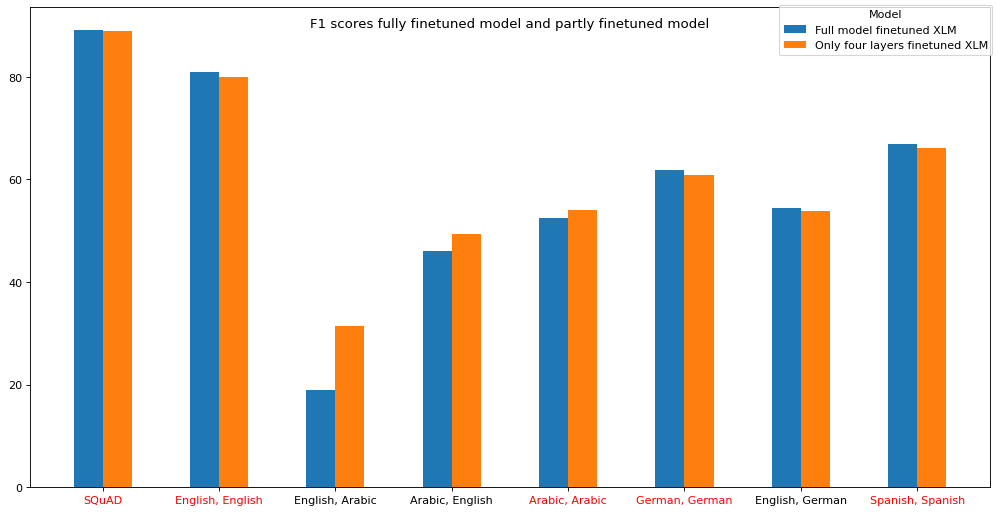

In [9]:
language_indexes = [ 'mlqa_en_en', 'mlqa_en_ar', 'mlqa_ar_en', 'mlqa_ar_ar', 'mlqa_de_de', 'mlqa_en_de','mlqa_es_es']

results_texts = ["SQuAD", "English, English", "English, Arabic", "Arabic, English", "Arabic, Arabic", "German, German", "English, German", "Spanish, Spanish"]

finetuned_full_model_f1 = []
finetuned_4_layers_f1 = []

# Add squad f1
finetuned_full_model_f1.append(results_no_layers_freezed_XLM["squad"]["all results"]["f1"])
finetuned_4_layers_f1.append(results_4_layers_freezed_XLM["squad"]["all results"]["f1"])

# Add mlqa-f1 for each language-pair
for language_index_pair in language_indexes:
  finetuned_full_model_f1.append(results_no_layers_freezed_XLM["mlqa"][language_index_pair]["all results"]["f1"])
  finetuned_4_layers_f1.append(results_4_layers_freezed_XLM["mlqa"][language_index_pair]["all results"]["f1"])

# Barplot
X = np.arange(8)
fig = plt.figure(figsize=(12, 6), dpi=80)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, finetuned_full_model_f1, width = 0.25)
ax.bar(X + 0.25, finetuned_4_layers_f1, width = 0.25)

plt.xticks(X + 0.25/2, results_texts)

fig.legend(ax,     # The line objects
           labels=["Full model finetuned XLM", "Only four layers finetuned XLM"],   # The labels for each line
           loc="best",   # Position of legend
           title="Model"  # Title for the legend
           )

# Mark mono-lingual tasks in red
for i in [0, 1, 4, 5, 7]:
  plt.gca().get_xticklabels()[i].set_color('red') 

fig.suptitle("F1 scores fully finetuned model and partly finetuned model")

plt.savefig('plots/f1_finetuned_vs_partly_finetuned.png', bbox_inches = "tight", dpi=300)

### Training time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


Text(0.5, 0.98, 'Training time in minutes: fully finetuned model and partly (layers 4-8) finetuned model')

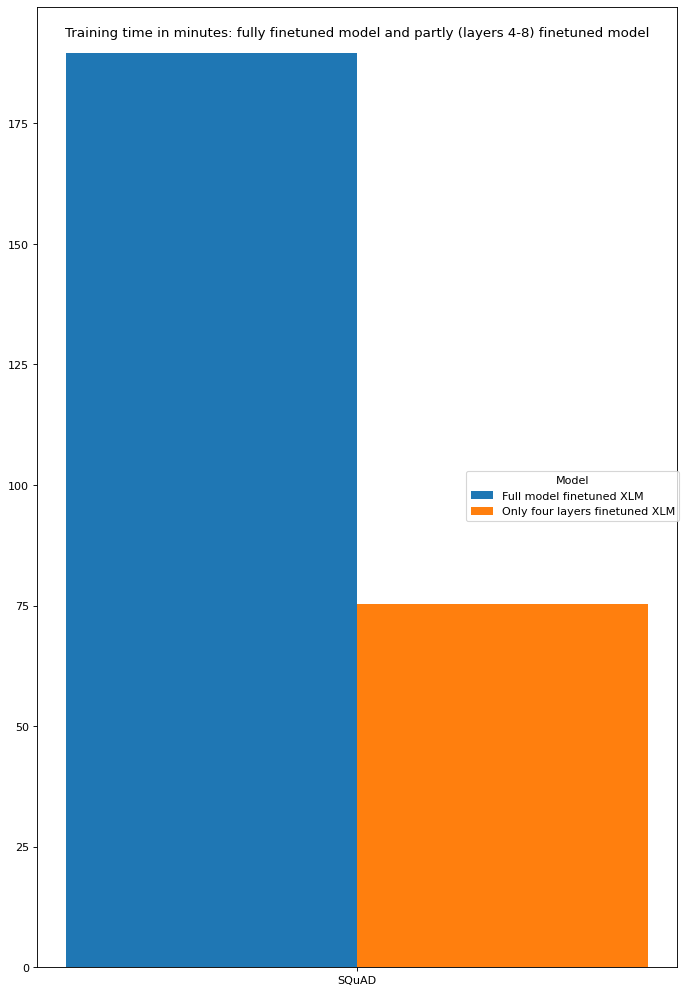

In [10]:
X = np.arange(1)
fig = plt.figure(figsize=(8, 12), dpi=80)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, [results_no_layers_freezed_XLM["squad"]["all results"]["train_runtime"]/60], width = 0.25)
ax.bar(X + 0.25, results_4_layers_freezed_XLM["squad"]["all results"]["train_runtime"]/60, width = 0.25)

plt.xticks(X + 0.25/2, results_texts)


fig.legend(ax,     # The line objects
           labels=["Full model finetuned XLM", "Only four layers finetuned XLM"],   # The labels for each line
           loc="right",   # Position of legend
           title="Model"  # Title for the legend
           )

fig.suptitle("Training time in minutes: fully finetuned model and partly (layers 4-8) finetuned model")


# Tables

In [13]:
language_texts = ["English, English", "English, Arabic", "Arabic, English", "Arabic, Arabic", "German, German", "English, German", "Spanish, Spanish"]


# Function to create tables
def score_table(results_f1_dictionary, language_indexes, language_pairs):
  f1_scores = []
  for i, language_index_pair in enumerate(language_indexes, 2):  
    f1_scores.append(get_mlqa_f1_by_layer(results_f1_dictionary, language_index_pair))
  df = pd.DataFrame(f1_scores).T
  df.columns = language_texts
  df.index += 1
  df.index.name = 'Layers'
  df = df.round(2)
  return df

pretrained_mBERT_table = score_table(results_non_finetuned_mBERT, language_indexes, language_texts)
finetuned_mBERT_table = score_table(results_finetuned_mBERT, language_indexes, language_texts)
pretrained_XLM_table = score_table(results_non_finetuned_XLM, language_indexes, language_texts)
finetuned_XLM_table = score_table(results_finetuned_XLM, language_indexes, language_texts)

In [14]:
%load_ext google.colab.data_table
#@title {run: 'auto'}
df_name = "finetuned_mBERT_table" #@param ["pretrained_mBERT_table", "finetuned_mBERT_table", "pretrained_XLM_table", "finetuned_XLM_table"]
tables = globals()[df_name]
tables

,"English, English","English, Arabic","Arabic, English","Arabic, Arabic","German, German","English, German","Spanish, Spanish"
Layers,,,,,,,
1,10.28,10.52,9.56,9.80,11.56,11.34,11.27
2,10.88,11.16,10.62,10.36,12.23,12.16,13.46
3,11.33,11.50,11.21,11.32,12.53,12.52,14.56
4,14.49,12.08,12.30,11.75,15.40,13.97,15.81
5,29.99,14.44,16.32,18.01,24.56,21.18,25.44
6,47.31,20.53,22.10,25.98,33.19,33.45,36.57
7,53.78,22.74,24.85,29.50,37.16,39.13,41.48
8,59.52,25.74,28.42,33.54,41.37,43.82,45.81
9,75.90,37.32,45.03,41.73,54.99,59.27,60.36


# Miscellaneous

Total calculation-time (lower bound):

In [15]:
total_calculation_time = 0

for layer_num in range(1, 13):
    layer = "layers "+str(layer_num)
    total_calculation_time = total_calculation_time + results_finetuned_XLM["squad"][layer]["all results"]["train_runtime"]
    total_calculation_time = total_calculation_time + results_finetuned_mBERT["squad"][layer]["all results"]["train_runtime"]
    total_calculation_time = total_calculation_time + results_non_finetuned_XLM["squad"][layer]["all results"]["train_runtime"]
    total_calculation_time = total_calculation_time + results_non_finetuned_mBERT["squad"][layer]["all results"]["train_runtime"]
print(total_calculation_time/(60*60), "hours of calculation time (minimum).")

35.81971252777779 hours of calculation time (minimum).
